[IPython Notebook](ETV.ipynb) |  [Python Script](ETV.py)

ETV Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe.dataset.etv()
print ps

N@_default: []
time_ecl@_default: [] d
time_ephem@_default: [] d
etv@_default: [] d
sigma: [] d


Currently, none of the available etv methods actually compute fluxes.  But if one is added that computes a light-curve and actually finds the time of mid-eclipse, then the passband-dependend parameters will be added here.

For information on these passband-dependent parameters, see the section on the [LC Dataset](LC)

### N

In [4]:
print ps['N']

Qualifier: N
Description: Epoch since t0
Value: []
Constrained by: 
Constrains: None
Related to: None


### time_ephem

NOTE: this parameter will be constrained when added through add_dataset

In [5]:
print ps['time_ephem']

Qualifier: time_ephem
Description: Expected time of eclipse from the current ephemeris
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### time_ecl

In [6]:
print ps['time_ecl']

Qualifier: time_ecl
Description: Time of eclipse
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### etv

NOTE: this parameter will be constrained when added through add_dataset

In [7]:
print ps['etv']

Qualifier: etv
Description: Eclipse timing variation (time_obs - time_ephem)
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### sigma

In [8]:
print ps['sigma']

Qualifier: sigma
Description: Observed uncertainty on time_obs
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### enabled

In [9]:
print ps['enabled']

NO PARAMETERS


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the ETV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [ORB dataset](ORB)

In [10]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

enabled@_default: True
dynamics_method: keplerian
ltte: False
stepsize: 0.01
orbiterror: 1e-20
store_mesh: False
mesh_method@_default: marching
delta@_default: 0.1
maxpoints@_default: 100000
distortion_method@_default: roche
gridsize@_default: 40
subdiv_num: 3
eclipse_alg: graham
atm@_default: blackbody
lc_method@_default@_default: numerical
rv_method@_default@_default: flux-weighted
rv_grav@_default@_default: False
etv_method@_default@_default: crossing
etv_tol@_default@_default: 0.0001 d


### etv_method

In [11]:
print ps_compute['etv_method']

Qualifier: etv_method
Description: Method to use for computing ETVs
Value: crossing
Choices: crossing


### etv_tol

In [12]:
print ps_compute['etv_tol']

Qualifier: etv_tol
Description: Precision with which to determine eclipse timings
Value: 0.0001 d
Constrained by: 
Constrains: None
Related to: None
Only relevant if: etv_method:crossing


Synthetics
------------------

In [13]:
b.add_dataset('ETV', N=np.linspace(0,10,11), dataset='etv01')

<ParameterSet: 19 parameters | contexts: dataset, constraint>

In [14]:
b.add_compute()

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

In [15]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]


<ParameterSet: 8 parameters | components: primary, secondary>

In [16]:
b['ETV@model'].twigs

['N@primary@etv01@phoebe01@tmpmodel@ETV@model',
 'time_ecl@primary@etv01@phoebe01@tmpmodel@ETV@model',
 'time_ephem@primary@etv01@phoebe01@tmpmodel@ETV@model',
 'etv@primary@etv01@phoebe01@tmpmodel@ETV@model',
 'N@secondary@etv01@phoebe01@tmpmodel@ETV@model',
 'time_ecl@secondary@etv01@phoebe01@tmpmodel@ETV@model',
 'time_ephem@secondary@etv01@phoebe01@tmpmodel@ETV@model',
 'etv@secondary@etv01@phoebe01@tmpmodel@ETV@model']

In [17]:
print b['time_ephem@primary@ETV@model']

Qualifier: time_ephem
Description: Expected time of eclipse from the current ephemeris
Value: [  0.   3.   6. ...,  24.  27.  30.] d
Constrained by: 
Constrains: None
Related to: None


In [18]:
print b['time_ecl@primary@ETV@model']

Qualifier: time_ecl
Description: Time of eclipse
Value: [ -4.27380296e-29   3.00000000e+00   6.00000000e+00 ...,
   2.40000000e+01   2.70000000e+01   3.00000000e+01] d
Constrained by: 
Constrains: None
Related to: None


In [19]:
print b['etv@primary@ETV@model']

Qualifier: etv
Description: Eclipse timing variation (time_obs - time_ephem)
Value: [ -4.27380296e-29   0.00000000e+00   0.00000000e+00 ...,
   0.00000000e+00   0.00000000e+00   0.00000000e+00] d
Constrained by: 
Constrains: None
Related to: None


Plotting
---------------

By default, ETV datasets plot as etv vs time_ephem.  Of course, a simple binary with no companion or apsidal motion won't show much of a signal (this is essentially flat with some noise).  To see more ETV examples see:

* [Apsidal Motion](../examples/apsidal_motion)
* [Minimial Hierarchical Triple](../examples/hierarchical_triple)
* [LTTE ETVs in a Hierarchical Triple](../examples/hierarchical_triple_etvs)

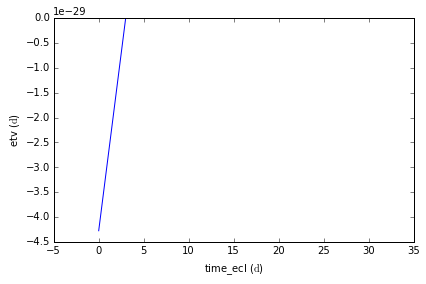

In [20]:
axs, artists = b['ETV@model'].plot()

Alternatively, especially when overplotting with a light curve, its sometimes handy to just plot ticks at each of the eclipse times.  This can easily be done by passing a single value for 'y'.

For other examples with light curves as well see:
* [Apsidal Motion](../examples/apsidal_motion)
* [LTTE ETVs in a Hierarchical Triple](../examples/hierarchical_triple_etvs)



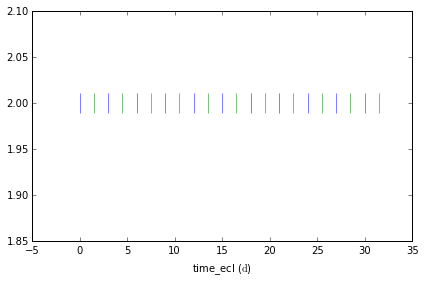

In [21]:
axs, artists = b['ETV@model'].plot(x='time_ecl', y=2)